In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os

# Agregar la carpeta raíz del proyecto al path
sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
#1. Cargar el modelo de lightgbm
import joblib
import shap

model = joblib.load('../models/lightgbm_model.joblib')
model

LGBMRegressor(learning_rate=0.07, max_depth=10, min_child_samples=60,
              n_estimators=600, n_jobs=-1, num_leaves=63, random_state=42,
              reg_lambda=1, subsample=0.8, verbose=-1)

In [3]:
import pandas as pd
#2. Cargar los datos procesados
data = pd.read_csv('../temp/train_processed.csv')
data.head()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,...,genre_sertanejo,genre_show-tunes,genre_singer-songwriter,genre_sleep,genre_soul,genre_spanish,genre_swedish,genre_techno,genre_trance,popularity
0,-0.879316,0.113265,1.385406,0.534688,-1.205307,-0.420738,1.259811,0.775116,1.850499,0.974891,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25
1,0.540589,0.146900,0.917125,-1.369571,1.321492,0.291974,0.794606,0.775116,-0.478386,1.204575,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40
2,-0.412704,-1.994580,0.807607,-1.369571,-0.363040,1.188899,0.757183,0.775116,0.050430,0.827256,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,39
3,-0.925505,-0.402485,0.554585,1.137791,-0.363040,0.160848,-0.446162,-1.290129,-0.139351,0.474848,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18
4,-0.023123,0.584166,1.238124,0.818361,1.040737,0.941926,0.487907,0.775116,-0.122656,1.243613,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27


In [4]:
target_col = 'popularity'
X = data.drop(columns=[target_col])
y = data[target_col]

In [5]:
# 3. Crear el explicador SHAP
explainer = shap.TreeExplainer(model)

In [6]:
# 4. Calcular los valores SHAP
shap_values = explainer.shap_values(X)

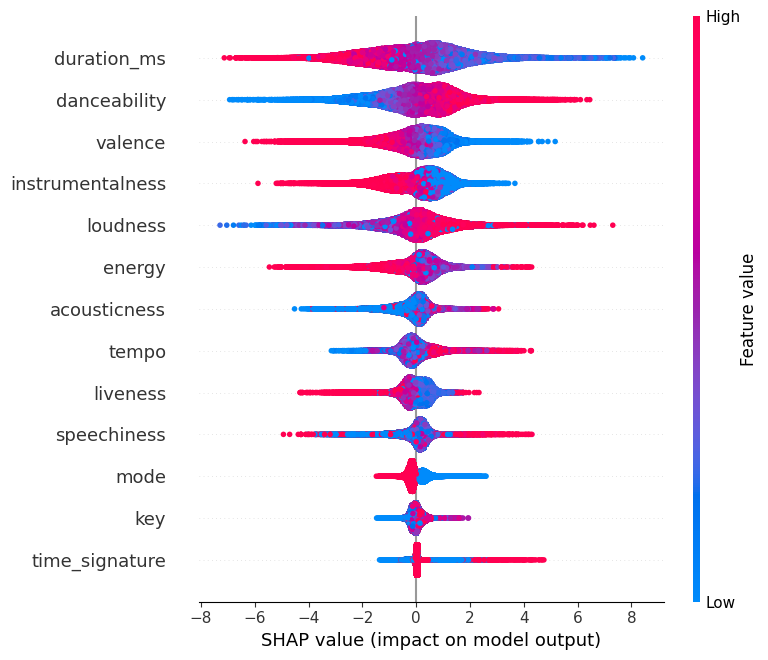

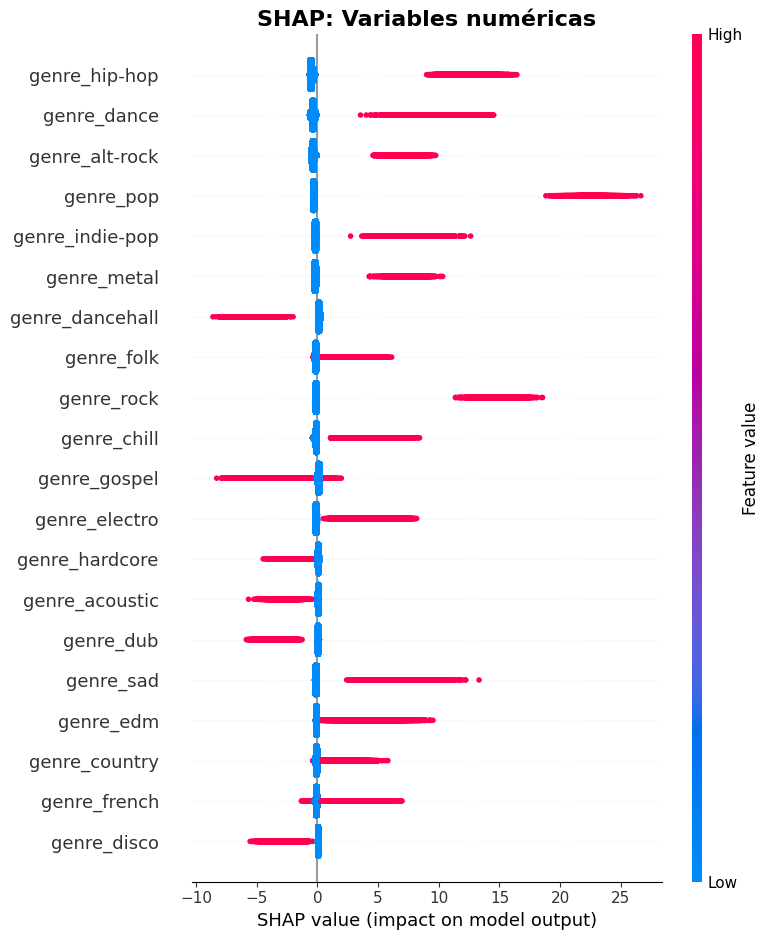

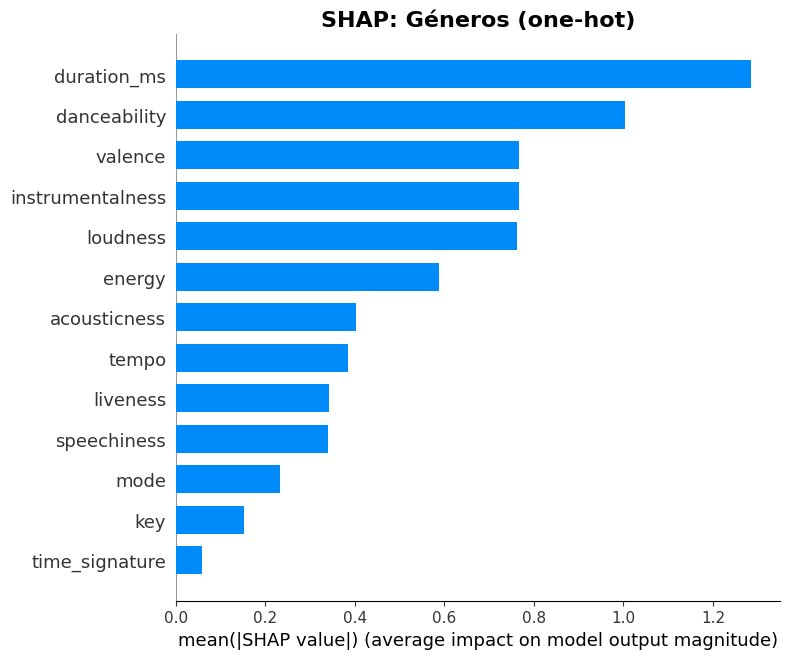

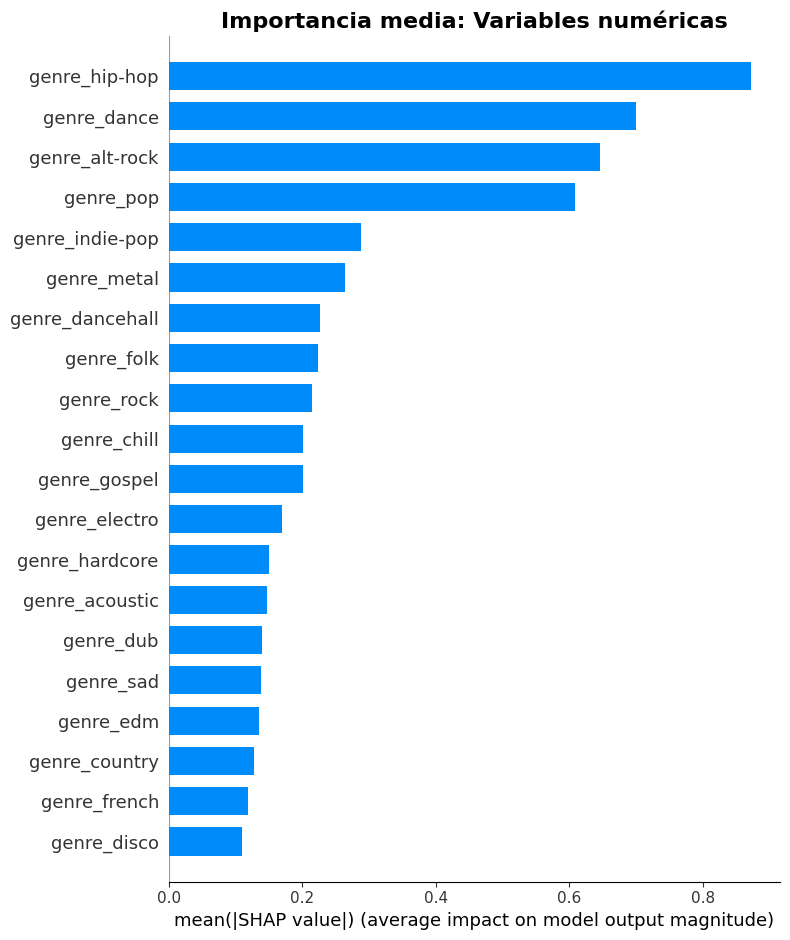

Text(0.5, 1.0, 'Importancia media: Géneros')

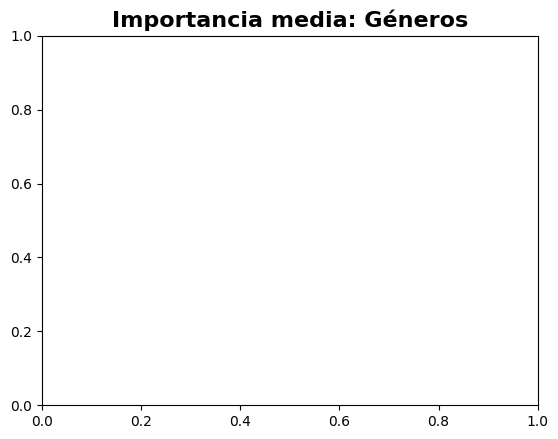

In [12]:
import shap
import matplotlib.pyplot as plt

# Variables numéricas
numeric_vars = [
    'acousticness','danceability','energy','instrumentalness',
    'key','liveness','loudness','mode','speechiness','tempo',
    'time_signature','valence','duration_ms'
]

# Variables de género
genre_vars = [c for c in X.columns if c.startswith('genre_')]

# ---- SHAP dot plot: variables numéricas ----
shap.summary_plot(
    shap_values[:, [X.columns.get_loc(c) for c in numeric_vars]],
    X[numeric_vars],
    plot_type="dot",
    show=True
)

plt.title("SHAP: Variables numéricas", fontsize=16, fontweight="bold")

# ---- SHAP dot plot: géneros ----
shap.summary_plot(
    shap_values[:, [X.columns.get_loc(c) for c in genre_vars]],
    X[genre_vars],
    plot_type="dot",
    show=True
)

plt.title("SHAP: Géneros (one-hot)", fontsize=16, fontweight="bold")

# ---- SHAP bar plot: variables numéricas ----
shap.summary_plot(
    shap_values[:, [X.columns.get_loc(c) for c in numeric_vars]],
    X[numeric_vars],
    plot_type="bar",
    show=True
)

plt.title("Importancia media: Variables numéricas", fontsize=16, fontweight="bold")

# ---- SHAP bar plot: géneros ----
shap.summary_plot(
    shap_values[:, [X.columns.get_loc(c) for c in genre_vars]],
    X[genre_vars],
    plot_type="bar",
    show=True
)

plt.title("Importancia media: Géneros", fontsize=16, fontweight="bold")
